In [1]:
import pandas as pd
#import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
expo = pd.read_csv("/home/harhar/Desktop/Import-Export/export.csv")  #readlink -f export.csv (to get the path of a file)
impo = pd.read_csv("/home/harhar/Desktop/Import-Export/import.csv")
#expo.info()                                        # for detailed info of the dataset
print(expo.shape)

print(expo.isnull().sum())

expo = expo.dropna()  #drops null value rows
#expo = expo.reset_index()
print("\n after dropna() \n")
print(expo.isnull().sum())

expo = expo.reset_index(drop=False)

expo.head()

print("\n For import data \n")

print(impo.isnull().sum())

impo = impo.dropna()

(137023, 5)
HSCode           0
Commodity        0
value        14038
country          0
year             0
dtype: int64

 after dropna() 

HSCode       0
Commodity    0
value        0
country      0
year         0
dtype: int64

 For import data 

HSCode           0
Commodity        0
value        11588
country          0
year             0
dtype: int64


In [2]:
India_import = impo['country'].nunique()
#print(India_import)
#print(impo.head())
India_export = expo['country'].nunique()
#print(type(impo))
#print(India_export)
#print "import countris",India_import
#print impo.apply(type).value_counts()
#print(impo.loc['CHINA P RP'])
#impo.set_index(['country'],in)

In [3]:
importing_countries=impo['country'].nunique()
exporting_countries=expo['country'].nunique()
print("India imports from:",importing_countries,"countries")
print("India exports to:",exporting_countries,"countries")

('India imports from:', 241, 'countries')
('India exports to:', 248, 'countries')


In [4]:
import_temp=impo.groupby(['country']).agg({'value':'sum'})
export_temp=expo.groupby(['country']).agg({'value':'sum'})

data_1=impo.groupby(['country']).agg({'value':'sum'}).sort_values(by='value').tail(10)
data_2=export_temp
data_3=data_2-data_1

data_1 = data_1.apply(lambda x : x / 1000)
data_2 = data_2.apply(lambda x : x / 1000)
data_3 = data_3.apply(lambda x : x / 1000)

#print(data_2).head(10)
#print(data_3)
df=pd.DataFrame(index=data_1.index.values)
#df=pd.concat([data_1,data_2,data_3])
df['Import']=data_1
df['Export']=data_2
df['Loss_Profit']=data_3

print(df)

                Import     Export  Loss_Profit
AUSTRALIA    115.59898   25.37229    -90.22669
GERMANY      119.66464   68.85545    -50.80919
KOREA RP     121.14358   38.02302    -83.12056
INDONESIA    128.16440   42.14884    -86.01556
IRAQ         142.47632    9.83361   -132.64271
SWITZERLAND  206.72903    9.99256   -196.73647
U S A        219.27666  360.60957    141.33291
SAUDI ARAB   241.55499   65.99599   -175.55900
U ARAB EMTS  256.28608  289.37488     33.08880
CHINA P RP   532.17751  121.80600   -410.37151


Text(0,0.5,'Value of transactions (in billion US$)')

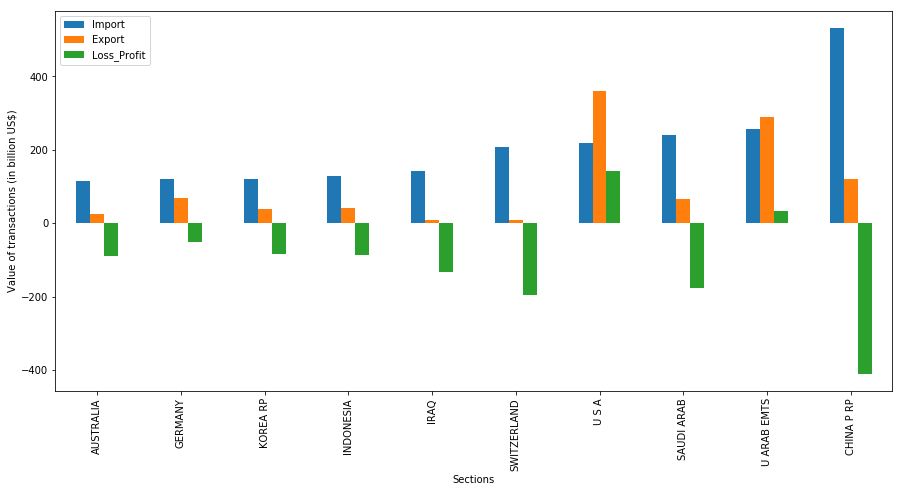

In [5]:
#df.index=HSCode['Sections'][data_1.index.values]
fig, ax = plt.subplots(figsize=(15,7))
df.plot(kind='bar',ax=ax)
ax.set_xlabel('Sections')
ax.set_ylabel('Value of transactions (in billion US$)')

Text(0,0.5,'Loss in trade in billion $')

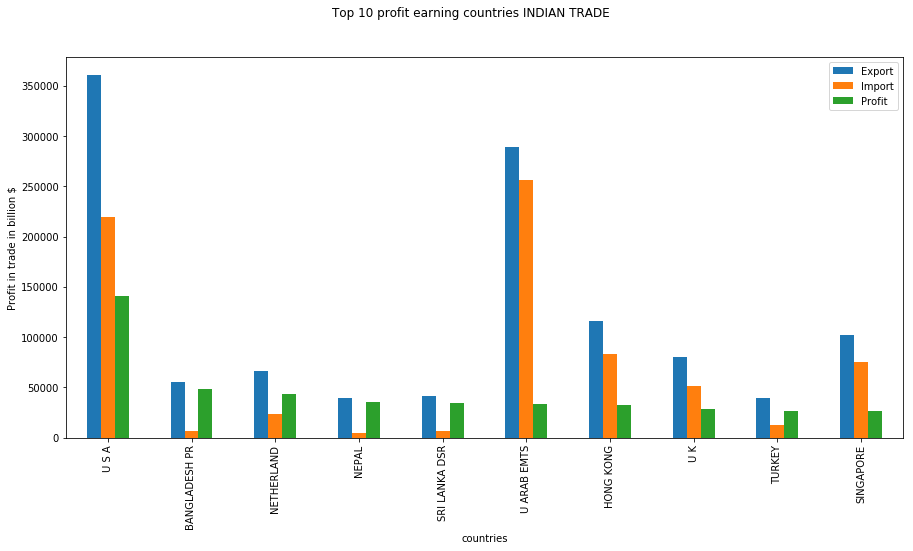

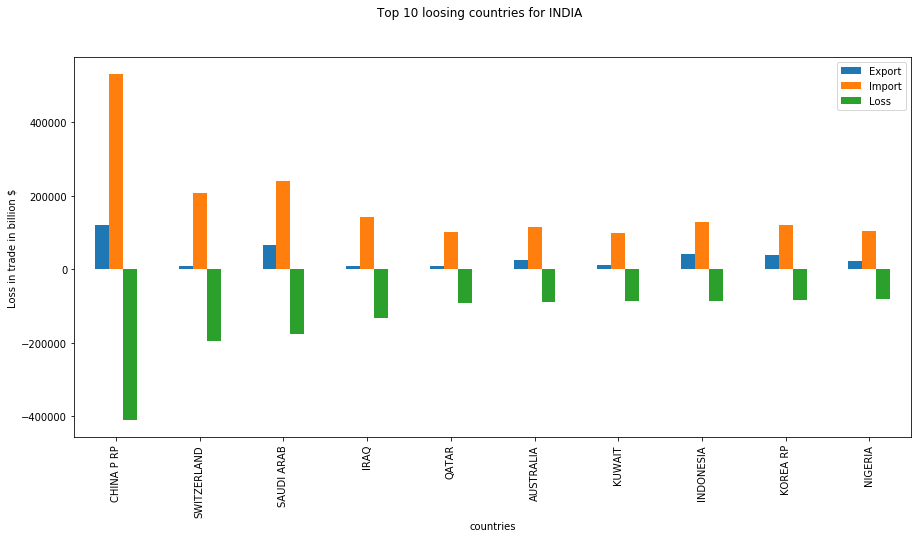

In [7]:
data_import = impo.groupby(['country']).agg({'value':'sum'})
data_export = expo.groupby(['country']).agg({'value':'sum'})

trade_with_all = pd.DataFrame(index = data_export.index.values)
trade_with_all['Export'] = data_export['value'].sort_values(ascending=True)
trade_with_all['Import'] = data_import['value']

trade_with_all['Import'].fillna(0,inplace=True)

trade_with_all['Profit_Loss'] = trade_with_all['Export'] - trade_with_all['Import']
trade_with_all = trade_with_all.sort_values(by='Profit_Loss',ascending = True)

df_Loss = trade_with_all.head(10)
df_Loss.rename(columns = {'Profit_Loss':'Loss'},inplace = True)

df_Profit = trade_with_all.tail(10)
df_Profit.rename(columns = {'Profit_Loss':'Profit'},inplace = True)
df_Profit = df_Profit.sort_values(by = 'Profit',ascending = False)

#print(df_Loss)
#print(df_Profit)

fig , ax = plt.subplots(figsize=(15,7))
df_Profit.plot(kind ='bar',ax = ax)
fig.suptitle('Top 10 profit earning countries INDIAN TRADE')
ax.set_xlabel('countries')
ax.set_ylabel('Profit in trade in billion $')


fig , ax = plt.subplots(figsize=(15,7))
fig.suptitle('Top 10 loosing countries for INDIA')
df_Loss.plot(kind = 'bar',ax = ax)
ax.set_xlabel('countries')
ax.set_ylabel('Loss in trade in billion $')

Text(0.5,1,'A single plot')

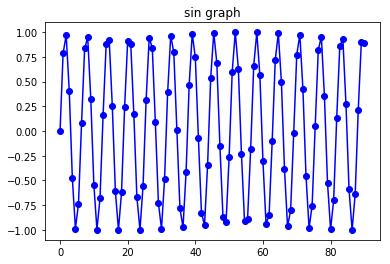

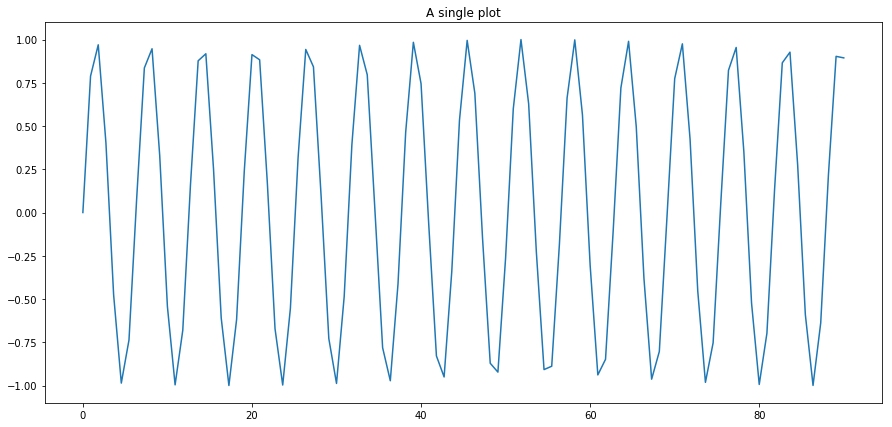

In [10]:
x = np.linspace(0,90,num = 100)
#print(in_array)
y = np.sin(x)
plt.plot(x , y , color = 'blue' , marker = 'o')
plt.title('sin graph')

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(x, y)
ax.set_title('A single plot')



In [7]:
# Import pandas package 
import pandas as pd 
	
# Define a dictionary containing employee data 
data = {'Name':['Jai', 'Princi', 'Gaurav', 'Anuj', 'Geeku'], 
		'Age':[27, 24, 22, 32, 15], 
		'Address':['Delhi', 'Kanpur', 'Allahabad', 'Kannauj', 'Noida'], 
		'Qualification':['Msc', 'MA', 'MCA', 'Phd', '10th'] } 

# Create own index 
index = {'a', 'b', 'c', 'd', 'e'} 

# Convert the dictionary into DataFrame 
df = pd.DataFrame(data, index) 
#print(df)
# set any column as index 
# Here we set age column as index 
df.set_index(['Age'], inplace = True) 

print(df)
# reset index without removing default index 
df.reset_index(level =['Age'], inplace = True) 
df 

       Address    Name Qualification
Age                                 
27       Delhi     Jai           Msc
24      Kanpur  Princi            MA
22   Allahabad  Gaurav           MCA
32     Kannauj    Anuj           Phd
15       Noida   Geeku          10th


,Age,Address,Name,Qualification
0,27,Delhi,Jai,Msc
1,24,Kanpur,Princi,MA
2,22,Allahabad,Gaurav,MCA
3,32,Kannauj,Anuj,Phd
4,15,Noida,Geeku,10th


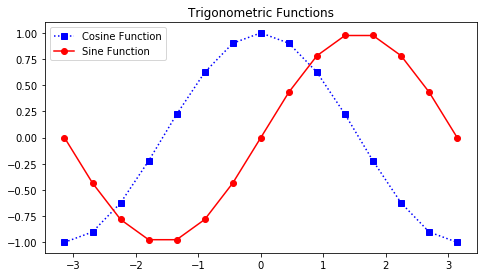

In [29]:
import matplotlib.pyplot as plt 
import numpy as np 


X = np.linspace(-np.pi, np.pi, 15) 
C = np.cos(X) 
S = np.sin(X) 

# [left, bottom, width, height] 
ax = plt.axes([0, 0.1, 1, 0.8]) 

# 'bs:' mentions blue color, square 
# marker with dotted line. 
ax1 = ax.plot(X, C, 'bs:') 

#'ro-' mentions red color, circle 
# marker with solid line. 
ax2 = ax.plot(X, S, 'ro-') 

ax.legend(labels = ('Cosine Function', 'Sine Function'),loc = 'upper left') 

ax.set_title("Trigonometric Functions") 

plt.show() 
